Unsupervised Learning : 
    
    knn , k-means 
    
    mall : 
        1- Cluster 
        

In [1]:
# prepare a customer segment for shopping mall business problem
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mall=pd.read_csv('Mall_Customers.csv')

In [3]:
mall

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
X=mall.iloc[:,[3,4]].values

In [5]:
from sklearn.cluster import KMeans

In [6]:
# calculate wcss for K=1 till 10
wcss=[]
for i in range(1,20):
    km=KMeans(n_clusters=i,random_state=1)
    km.fit(X)
    wcss.append(km.inertia_)

In [7]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30566.451130251862,
 25005.55037243283,
 21996.523372372307,
 19746.911957660894,
 17602.19046838677,
 15926.627039985106,
 14631.802353268315,
 12793.951692914929,
 12002.023047743332,
 11150.576171529621,
 10264.837447764541,
 9490.19002831011,
 8880.551059466849]

Text(0,0.5,'wcss')

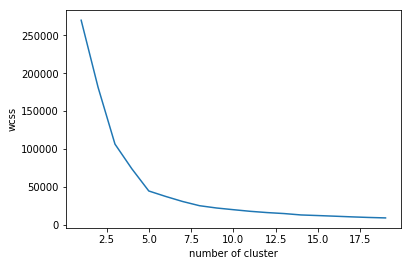

In [8]:
plt.plot(range(1,20), wcss)
plt.xlabel('number of cluster')
plt.ylabel('wcss')

In [9]:
# predict with KMeans
#K=3
km3=KMeans(n_clusters=3, random_state=1)
y3=km3.fit_predict(X)

In [10]:
#evaluation
from sklearn.metrics import silhouette_score
silhouette_score(X,y3)

0.46761358158775435

In [11]:
#K=5
km5=KMeans(n_clusters=5, random_state=1)
y5=km5.fit_predict(X)
silhouette_score(X,y5)

0.553931997444648

Text(0.5,1,'customer segmentation')

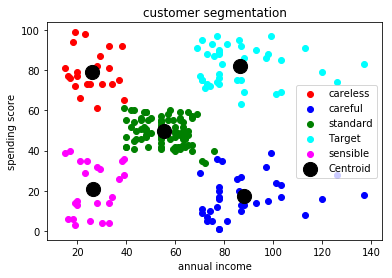

In [12]:
# plt.scatter(X, Y)
plt.scatter(X[y5==0,0], X[y5==0,1], c='red', label='careless')
plt.scatter(X[y5==1,0], X[y5==1,1], c='blue', label='careful')
plt.scatter(X[y5==2,0], X[y5==2,1], c='green', label='standard')
plt.scatter(X[y5==3,0], X[y5==3,1], c='cyan', label='Target')
plt.scatter(X[y5==4,0], X[y5==4,1], c='magenta', label='sensible')
plt.scatter(km5.cluster_centers_[:,0], km5.cluster_centers_[:,1],s=200, c='black',label='Centroid')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.legend()
plt.title('customer segmentation')